In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

Load data...
Start training...
[1]	valid_0's l2: 0.733209	valid_0's auc: 0.702899
Train until valid scores didn't improve in 5 rounds.
[2]	valid_0's l2: 0.728799	valid_0's auc: 0.745816
[3]	valid_0's l2: 0.724479	valid_0's auc: 0.753918
[4]	valid_0's l2: 0.720219	valid_0's auc: 0.757159
[5]	valid_0's l2: 0.71587	valid_0's auc: 0.766189
[6]	valid_0's l2: 0.711655	valid_0's auc: 0.76839
[7]	valid_0's l2: 0.707576	valid_0's auc: 0.769326
[8]	valid_0's l2: 0.703516	valid_0's auc: 0.76781
[9]	valid_0's l2: 0.699551	valid_0's auc: 0.767979
[10]	valid_0's l2: 0.695651	valid_0's auc: 0.767254
[11]	valid_0's l2: 0.691905	valid_0's auc: 0.76677
[12]	valid_0's l2: 0.68803	valid_0's auc: 0.769576
[13]	valid_0's l2: 0.684431	valid_0's auc: 0.768898
[14]	valid_0's l2: 0.680729	valid_0's auc: 0.770237
[15]	valid_0's l2: 0.677048	valid_0's auc: 0.77072
[16]	valid_0's l2: 0.67348	valid_0's auc: 0.770213
[17]	valid_0's l2: 0.669754	valid_0's auc: 0.773107
[18]	valid_0's l2: 0.66609	valid_0's auc: 0.7748

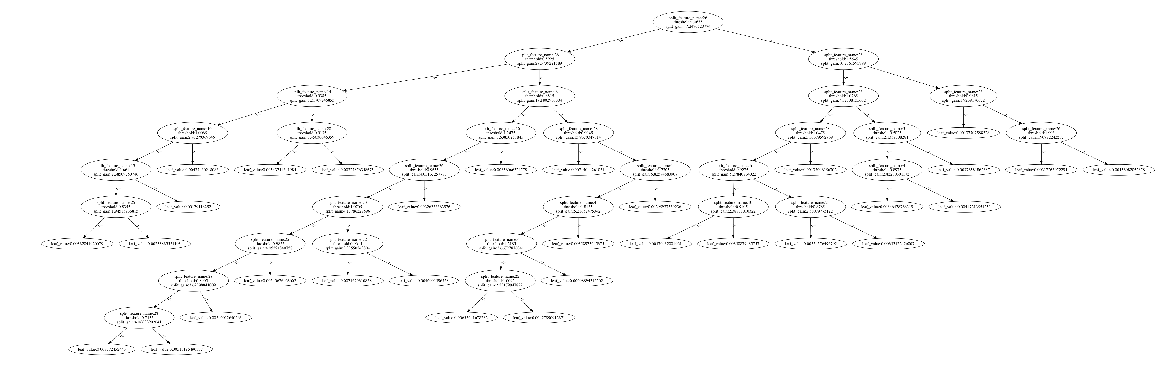

In [22]:
# load or create your dataset
print('Load data...')
df_train = pd.read_csv('data/regression.train', header=None, sep='\t')
df_test = pd.read_csv('data/regression.test', header=None, sep='\t')

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'num_trees': 1,             # set the number of trees in booster = 1
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,         # set number of iterations = 20
                valid_sets=lgb_eval,
                early_stopping_rounds=5)




ax = lgb.plot_tree(gbm, tree_index=19, figsize=(20, 8), show_info=['split_gain'])
plt.show()

IndexError: tree_index is out of range.

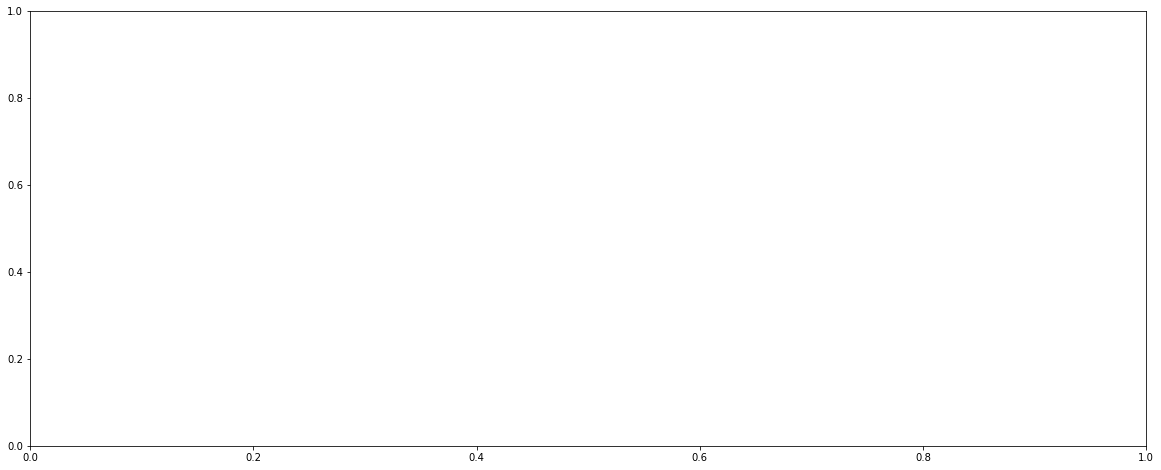

In [23]:
ax = lgb.plot_tree(gbm, tree_index=20, figsize=(20, 8), show_info=['split_gain'])
plt.show()

#### After training, we find that there are 20 trees in the booster, which is conflict with num_trees in booster config.